# 第四讲 写作文本中的句法结构分析

本课目标
- 介绍句法结构的基本分析方法
- 介绍写作评估中常用的句法复杂度分析指标
- 学习使用基于NLP技术开发的句法复杂度分析工具

In [ ]:
%pip install --upgrade -r requirements.txt
%pip install git+https://github.com/Frankstein73/neosca
!python -m spacy download en_core_web_sm


In [ ]:
import os
# read the txt file in the data directory and save the data in the dict
essay_dict = {}
files = os.listdir('./DATA') # list of files in the DATA directory
for file in files:
    if file.endswith('.txt'): # only read the txt file
        with open('./DATA/'+file, 'r', encoding="utf-8-sig") as f: # open the files
            essay = f.read()
            essay_dict[file] = essay # save the data in the dict

# show the data in the dict
result = {}
for key, value in essay_dict.items():
    print(f"Filename: {key}")
    print(f"Essay: {value}")
    print("------------------------------------")
    result[key] = {} # save the result in the dict

# 1. 研究背景
在第三章中，我们介绍了一系列分析写作词汇复杂度的方法，以及基于NLP技术的自动化词汇复杂度分析工具。在本章，我们会将视角拉高，从单个词扩展到短语以及句子层面，去探究学习者在写作过程中，除了使用更长更复杂的词汇，如何通过利用更丰富的短语结构，以及更多样的句式来充实自己的表达，在句子中涵盖更多的信息。

## 1.1 写作中的句法特征
句法是指确定语言单位如何组合以表明一系列语言含义和功能的原则。而对于语言单位的组合方式，研究者通常使用以下三种方式进行分类：成分（较小的单位形成越来越大的单位）、依存关系（组成语言表达的各个单词之间的分层关系）或搭配（从相对固定的表达，例如习语到模式化的共现模式）(Bulté et al., 2024)。  
句法复杂度通常是指口语以及书面语中句子结构的多样性和复杂性(Lei et al., 2023; Lu, 2011; Ortega, 2003; Pallotti, 2015)。许多过往研究都发现，能够习得并且产出复杂句子的学习者通常可以在写作任务中有更好的表现，并且有更高的语言水平(Larsen-Freeman, 1978; Lei et al., 2023; Lu, 2011; Vyatkina, 2012; Wolfe-Quintero et al., 1998)。因此，句法复杂度被广泛认为是衡量二语学习者语言水平和语言发展，尤其是二语写作发展的重要指标(Crossley & McNamara, 2014; Foster & Skehan, 1996; Lei et al., 2023; Ortega, 2003, 2012)。  
## 1.2 句法复杂度分析指标
为了更精确的衡量句法复杂度，过往研究者开发了一系列句法复杂度分析指标来量化分析学习者的句子结构。其中最为常用的是一系列基于长度的指标和基于频数的指标，例如平均句子长度、平均从句长度，每句单位均数等。  
此外，也有很多研究者指出以上指标颗粒度过粗，并且缺乏语言学解释力，并不能够准确描绘学习者的句法发展，以及不同学习者在不同语体上的句法表现，因此，一系列更加精细化的句法复杂度指标被提出。这些指标着眼点从句子整体下降到词和短语层面，更加关注不同结构在句子中的联系以及起到的作用，例如，形容词短语作主语频数，名词短语作主语频数等。尽管这些指标大多还是基于频数或者比率的指标，但他们相较于粗颗粒的传统句法复杂度指标，更具有语言学解释力。  
除此之外，也有学者采用依存句法的视角来对句子进行分析。依存句法认为词语之间存在不同的非对称关系，例如主谓，动宾等。关系种类，关系词距离，关系方向决定了句子结构的多样性，同时也从人类认知能力限制的层面解释了句子加工的难易程度，为句法复杂度分析提供了一个新的视角。  
接下来我们将分别对这三类指标进行详细解释，并且介绍能够生成这几类指标的相应自动化分析工具。

## 2. 句法复杂度分析指标及分析工具
### 2.1 传统句法复杂度分析指标
针对传统的粗颗粒句法复杂度指标，我们在本节将主要介绍由陆小飞老师在2010年开发的自动化句法复杂度分析工具中使用的14个指标，其中包含了五个维度的复杂度指标(Lu, 2010)。
#### 2.1.1 语言产出长度指标
这个维度的指标主要关注学习者在语言产出中不同结构的平均长度，包括平均句长(Mean length of sentence, MLS)，平均T单位长度(Mean length of T-unit, MLT)，平均从句长度(Mean length of clause, MLC)。这三个指标分别度量了三个语言单位：句子，T单位，以及从句。句子是由一组单词组成，由表示句子结束的标点符号进行分割的结构，这些标点符号包括：句号、问号、感叹号、引号和省略号(Hunt 1965, Tapia 1993)，例如，I ate an apple. T单位是一个主句加上任何附着于其上或嵌入其中的从属句或非从句结构(Hunt, 1970)，例如，在“English is required in almost all tests, and some top schools are even teaching a second foreign language.“中，and前后分别是两个T单位。而从句则是主语加上起限定动词的结构，包括非限定性从句、形容词性从句、状语从句以及名词性从句(Hunt 1965,  Polio 1997)，例如在“As far as I'm concerned, I hold that cloning for solutions of certain diseases can be allowed and legitimated.”中，“As far as I'm concerned“是一个状语从句。
#### 2.1.2 并列结构频数指标
在这个维度，我们对句子中的并列短语以及T单位数量进行统计。具体采用三个指标：每句T单位数量(T-units per sentence T/S)，每T单位并列短语数量(Coordinate phrases per T-unit, CP/T)，每从句并列短语数量(Coordinate phrases per clause, CP/C)。并列短语是指由连词连接的形容词、副词、动词、以及名词短语(Cooper, 1976)。
#### 2.1.3 从属结构频数指标
在这个维度，我们将目光聚焦于T单位内部，度量其内部结构的复杂度，具体使用四个指标：每T单位从句数量(Clauses per T-unit, C/T)，每T单位复杂T单位数量(Complex T-units per T-unit, CT/T)，每T单位限定性从句数量(Dependent clauses per T-unit, DC/T)，每从句限定性从句数量(Dependent clauses per clause, DC/C)。复杂T单位是指包含限定从句的的T单位(Casanave  1994)。限定性从句通常会作为主句的一个成分出现，例如形容词，副词，或名词(Cooper 1976, Hunt 1965, Kameen 1979)。
#### 2.1.4 短语结构频数指标
在这个维度，我们进一步将目光聚焦于从句内部，度量从句内部的短语成分复杂度，具体使用一下三个指标：每T单位复杂名词短语数量(Complex nominals per T-unit, CN/T)，每从句复杂名词短语数量(Complex nominals per clause, CN/C)，每T单位动词短语数量(Verb phrases per T-unit, VP/T)。复杂名词短语包括：（i）名词加上形容词、所有格、介词短语、定语从句、分词或同位语，（ii）名词从句，以及（iii）作为主语的动名词和不定式(Cooper, 1976)。动词短语则包括限定性和非限定性动词短语。
#### 2.1.5 二语句法复杂度自动分析器-L2SCA
二语句法复杂度自动分析器(Second Language Syntactic Complexity Analyzer, L2SCA)是陆小飞老师开发的基于Python的自动化句法复杂度分析工具，该工具可以读取单个文本或批量处理多个文本，并输出上述14个句法复杂度指标，在二语习得研究领域具有广泛的应用。以下是如何调用L2SCA进行句法复杂度分析的示例代码：


In [ ]:
#插入代码，调用L2SCA对示例文件夹中的文本进行句法复杂度分析
#Lu, X. (2010). Automatic analysis of syntactic complexity in second language writing. International Journal of Corpus Linguistics, 15(4), 474–496. https://doi.org/10.1075/ijcl.15.4.02lu
#https://sites.psu.edu/xxl13/l2sca/

from neosca.ns_sca.ns_sca import Ns_SCA, Ns_SCA_Counter
import os
def run_sca(text: str|None=None, filepath: str|None=None, output_file: str|None=None):
    sca = Ns_SCA(ofile_freq=output_file) # initialize the sca
    def analyze_text(text: str) -> dict[str, float]:
        sca.run_on_text(text) # run the sca on the text
        counter: Ns_SCA_Counter = sca.counters[0] # get the counter
        name_value_map: dict[str, str] = counter.get_all_values(precision=4) # get the name and value map
        name_value_map.pop("Filepath") # remove the filepath
        ret: dict[str, float] = {k: float(v) for k, v in name_value_map.items()} # convert the name and value map to a dictionary
        return ret

    def analyze_file(filepath: str) -> dict[str, float]:
        counter: Ns_SCA_Counter = sca.run_on_file_or_subfiles(filepath) # run the sca on the file
        name_value_map: dict[str, str] = counter.get_all_values(precision=4) # get the name and value map
        name_value_map.pop("Filepath") # remove the filepath
        ret: dict[str, float] = {k: float(v) for k, v in name_value_map.items()} # convert the name and value map to a dictionary
        return ret

    if filepath is not None:
        return analyze_file(filepath)
    elif text is not None:
        return analyze_text(text)
    else:
        raise ValueError("Either filepath or text must be provided")

files = os.listdir('./DATA') # list of files in the DATA directory
os.makedirs('./sca_result', exist_ok=True)
for key, value in essay_dict.items(): # iterate over the essay_dict
    print(f"processing {key}") 
    base_name = key.split('.')[0]
    run_sca(text=value, output_file=f'./sca_result/{key}.csv') # run the sca on the text and save the result to a csv file

    

### 2.2 精细化句法复杂度分析指标
虽然传统的粗颗粒度句法复杂度指标已经可以解释学习者口语/书面语产出中的句法复杂度，并且描绘其发展轨迹。但研究者发现这些指标缺乏语言学上的解释力（例如，从句长可能意味着句子更复杂，但学习者是采用什么方式，运用什么结构使得从句变长了呢？），并且多数指标都聚焦与从句层面，而对从句内部的短语结构关注度不足。Biber等人在2011年的研究也指出：从句结构更常用于非正式场合的表达，而短语结构在书面，尤其是学术场合的表达中更为常见。因此，句法发展研究需要借助更加全面和精细化的复杂度分析指标。  
基于此，Kyle等人在2016年开发了自动化句法复杂度以及成熟度分析工具(Tool for Automatic Analysis of Syntactic Sophistication and Complexity, TAASSC)，该工具可以自动计算以下三个维度的精细化度句法复杂度以及成熟度指标：从句复杂度(clausal complexity)、短语复杂度(phrasal complexity)、句法结构成熟度(synatactic sophistication)。
#### 2.2.1 从句复杂度指标
传统粗颗粒句法复杂度指标将不同种类的结构整合成两种：限定性从句和复杂名次短语，而在TAASSC中，Kyle等人根据句法分析结果，对不同种类的结构分别进行了计算，例如：形容词性补语、状语从句、主语从句等，共计31个指标。具体指标细节可以参考论文：Kyle, K. (2016). Measuring syntactic development in L2 writing: Fine grained indices of syntactic complexity and usage-based indices of syntactic sophistication [Doctoral dissertation, Gorgia State University]. https://scholarworks.gsu.edu/alesl_diss/35。下图是TAASSC中从句复杂度指标的类别及示例：  
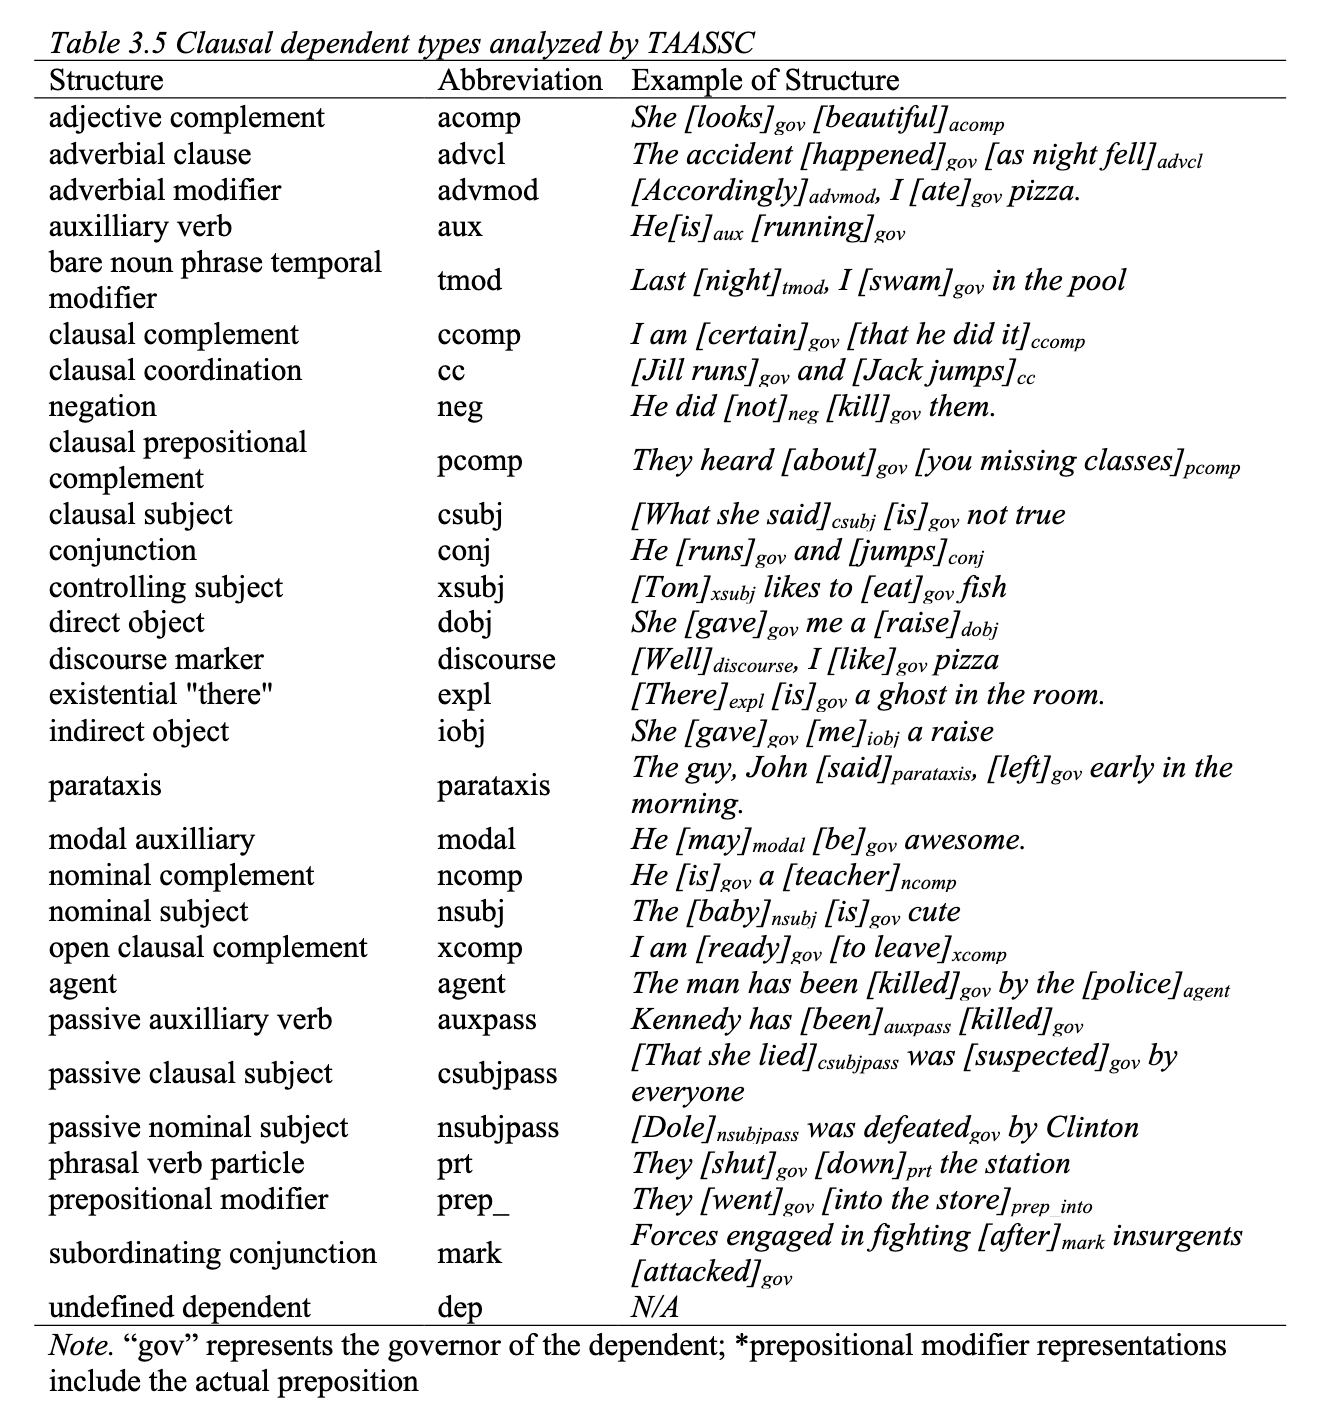
#### 2.2.2 短语复杂度指标
不同与粗颗粒句法复杂度指标，TAASSC中不仅包含了不同种类的名词短语结构复杂度指标，还包括了不同种类的依存关系短语。具体来说，名词短语结构包括：名词短语作主语，名词短语作补语等；依存关系短语包括：形容词短语作修饰语，介词短语作修饰语等，共计132个指标。具体指标细节可以参考论文：Kyle, K. (2016). Measuring syntactic development in L2 writing: Fine grained indices of syntactic complexity and usage-based indices of syntactic sophistication [Doctoral dissertation, Gorgia State University]. https://scholarworks.gsu.edu/alesl_diss/35。下图是TAASSC中从句复杂度指标的类别及示例：  
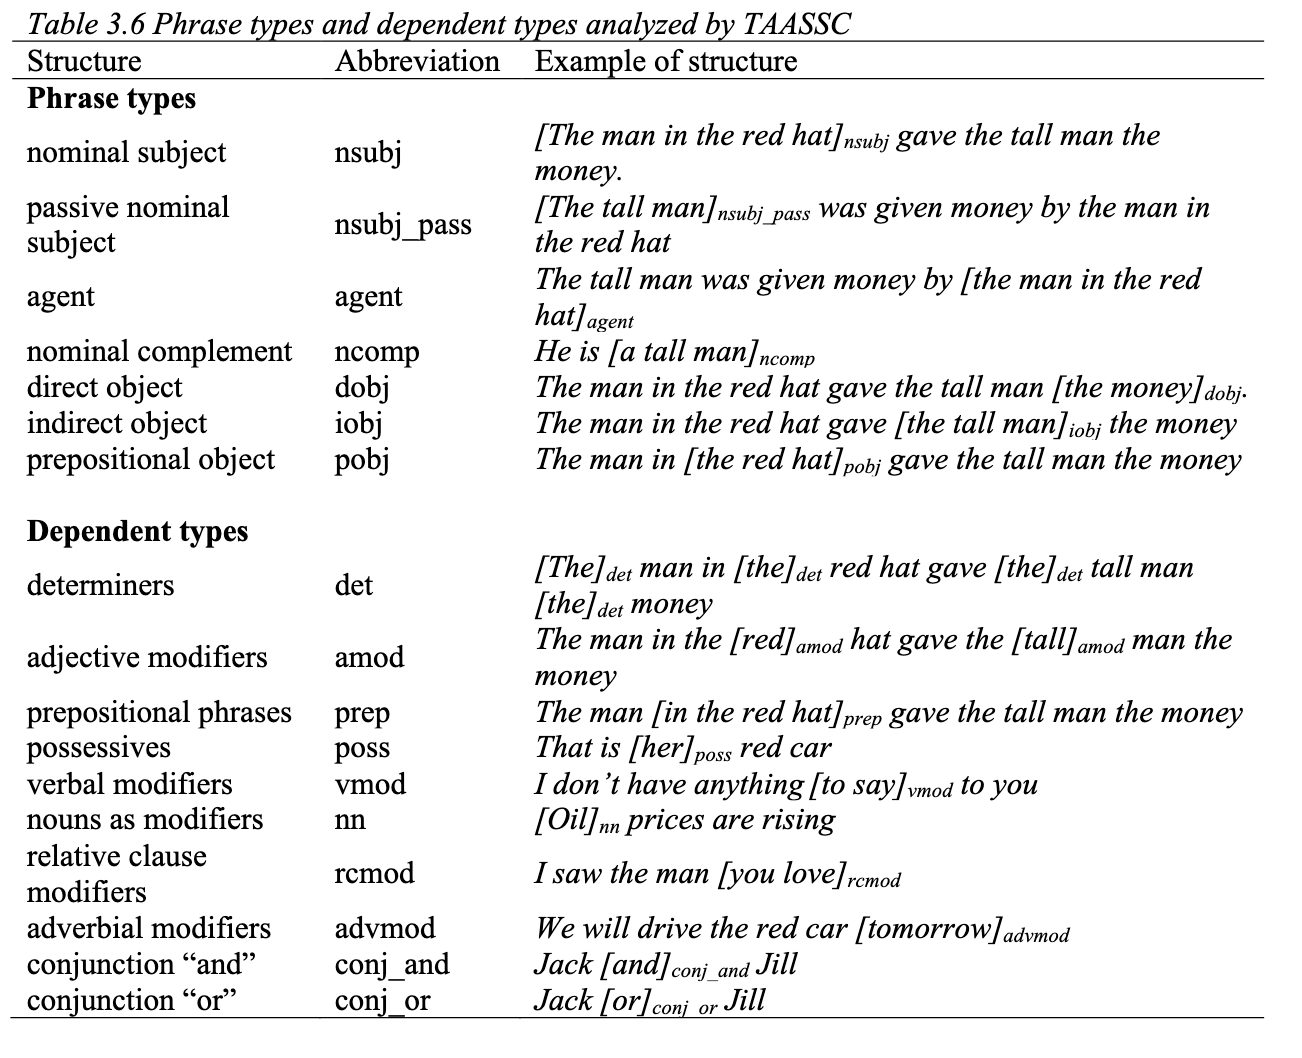
#### 2.2.3 句法结构成熟度指标
与词汇成熟度类似，句法结构成熟度值得也是学习者语言产出中出现的句法结构在不同的参考语料中出现的频率，在学术语料中频繁出现的句法结构会比在其他非学术语料中高频出现的句法结构更加复杂，因此学习者如果能更多的使用学术语料中的句法结构，则说明其对于句法结构的掌握更加熟练，复杂度更高。TAASSC计算了15个基本的句法成熟度指标。每个基本指数包括一些变体，共38个指标。每个指标都是参照COCA中的五个子语料库（所有书面语料、学术语料、小说、杂志和报纸）计算的，共计190个句法成熟度指标。具体指标细节可以参考论文：Kyle, K. (2016). Measuring syntactic development in L2 writing: Fine grained indices of syntactic complexity and usage-based indices of syntactic sophistication [Doctoral dissertation, Gorgia State University]. https://scholarworks.gsu.edu/alesl_diss/35。
#### 2.2.4 精细化句法复杂度指标分析器-TAASSC
句法成熟度以及复杂度自动分析器(TAASSC)是Kyle等人在2016年开发的自动化精细化句法复杂度分析器。其运用各种自然语言处理技术：词性标注(Part-of-Speech tagging)，成分分析(Consituency parsing)，依存关系分析(Dependency parsing)，可以完成单个文本以及批量文本的自动化分析。下面是如何调用TAASSC进行精细化句法分析的示例代码：

In [ ]:
#插入代码，调用TAASSC对示例文件夹中的文本进行精细化句法复杂度分析
#Kyle, K., & Crossley, S. A. (2018). Measuring syntactic complexity in L2 writing using fine‐grained clausal and phrasal indices. Modern Language Journal, 102(2), 333–349. https://doi.org/10.1111/modl.12468
#https://github.com/kristopherkyle/TAASSC
from TAASSC.TAASSC import data_analysis
import os
os.makedirs("./taassc_result", exist_ok=True)
for key, value in essay_dict.items():
    print(f"processing {key}")
    output:dict[str, float] = data_analysis(value)
    # save output to csv
    base_name = key.split('.')[0]
    with open(f"./taassc_result/{base_name}.csv", "w") as f:
        for k, v in output.items():
            f.write(f"{k},{v}\n")

### 2.3 依存句法复杂度分析指标
#### 2.3.1 依存句法基本知识
无论是传统的句法复杂度指标，还是精细化句法复杂度指标，本质上还是基于长度或者频数的指标，它们可以帮助研究者更加直观的了解学习者语言产出中使用了什么样的句法结构，以及不同句法结构的出现频次和长度，从而对其语言产出有一个全面的了解。但这些指标都还是停留在形式层面，而对学习者选择或者不选择某种句法结构背后的原因并为给出解释。而依存句法则从人类认知能力规则的角度，对这背后的原因试图展开解释。简单来说：人类的认知资源是有限的，体现为有限的工作记忆容量，因此在处理词与词之间的关系，连词成句的时候，两个词的距离越远，处理难度越大，对人的认知能力越高，因此，出现这种结构的句子更复杂。  
上述提到的词与词之间的关系，在依存句法中被定义为从属词和支配词之间的非对称关系。依存关系的有三大特点(刘海涛, 2023)：  
- 二元性：依存关系指的是两个词，从属词和支配词，之间的关系。如下图，所有依存关系仅存在于两个词之间；  
- 非对称性：依存关系是有向的，通常由支配词指向从属词。如下图，lazy和student之间的依存关系由支配词student指向从属词lazy；  
- 有标记：依存关系是有标记的，即依存关系有不同种类。如下图，这句话中存在不同的依存关系：nsubj：名词作主语；amod：形容词作修饰语等；  
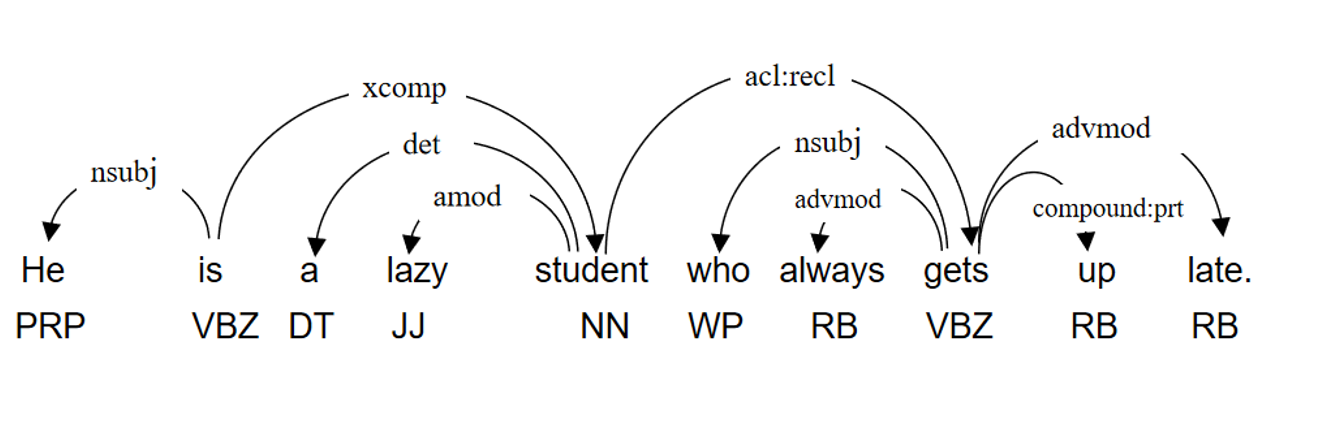
#### 2.3.2 依存距离指标-MDD
正如上图所示，lazy和student之间是相邻的，而student和gets之间却间隔了两个词，因此根据我们上文提到的人类认知规则，人脑在处理这两个依存关系的时候对于工作记忆容量的需求也就是不同的，处理student和gets之间的依存关系需要更多的认知资源。因此，研究者将依存距离定义为一个句子中形成依存关系的支配词与从属词之间的线性距离。过往研究表明人类的工作记忆容量最多能同时处理5-9个词(Yngve, 1960)，这一生理上的限制也就导致了句子不可能无限的长下去，并且为了减轻认知负担，人类在完成语言表的时候往往会选择依存距离更短的表达，也就是依存距离最小化。那反过来，依存距离越长的句子也就意味着人脑处理起来越复杂，越耗时，也就意味着更高的句法复杂度。因此，依存距离这一指标以及依存距离最小化这一原则，被广泛的应用于各种语言学研究中。为了衡量一个句子或者一篇文本对于人脑处理的认知负担或者句子的复杂度，刘海涛老师在2008年提出了平均依存距离(Mean Dependency Distance)这一指标(Liu, 2008)，具体计算方式如下：我们将完成依存关系标注的句子标号，第一个词序号为1，以此类推；每一个依存关系中支配词序号减去从属词序号的绝对值即为二者之间的依存距离，我们对语料中所有依存距离的绝对值求平均，就得到了该语料的MDD。上文例句的依存距离为：(1+3+2+1+3+4+1+2+1)/9=2.22。
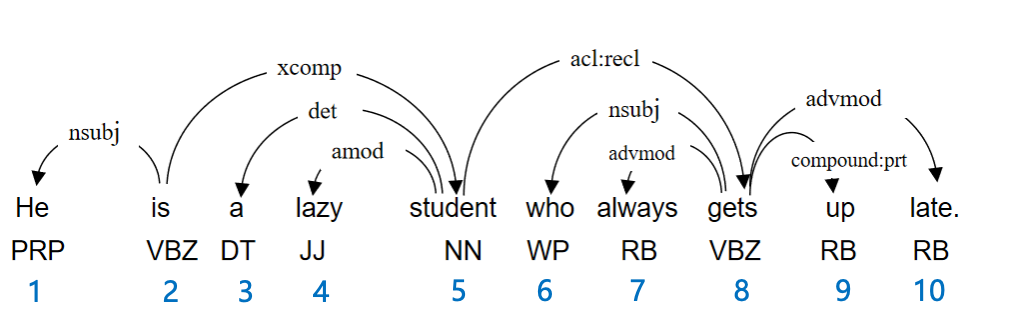
#### 2.3.4 依存层级距离指标-MHD
尽管平均依存距离MDD在很多情况下已经反映句子的复杂程度，但其还是将依存关系简单表示在一维空间上，也就是只考虑了词与词的线性关系。但研究者发现，句子中不同词语的权重并不相同，删除有些词对整体语义影响不大，但如果删除某些词则会导致句子不知所云，例如上文例子中，删除lazy的和删除gets对句子语义的影响显然是不同的，这就说明句子内部其实是存在层级结构的，也就是树状结构-砍断树干和树枝造成的影响截然不同。因此，我们将依存关系的一维表达扩展到二维层级结构，就可以得到依存关系树。在下方例子中，has是整个依存结构树的根节点，即第一层，以此类推，an和interesting作为对于宾语book的修饰和限定，位于最上层，即第三层。类比MDD指标的计算，Jing和Liu在2015年提出了平均层级距离(Mean Hierarchical Distance, MHD)这一指标，具体来说，层级距离表示子节点在垂直方向上的投影点与根词投影点的距离，那么平均层级距离即树库中所有层级距离的平均值。下面例句的依存层级距离为：(2+1+2+2+1)/5=1.6。  
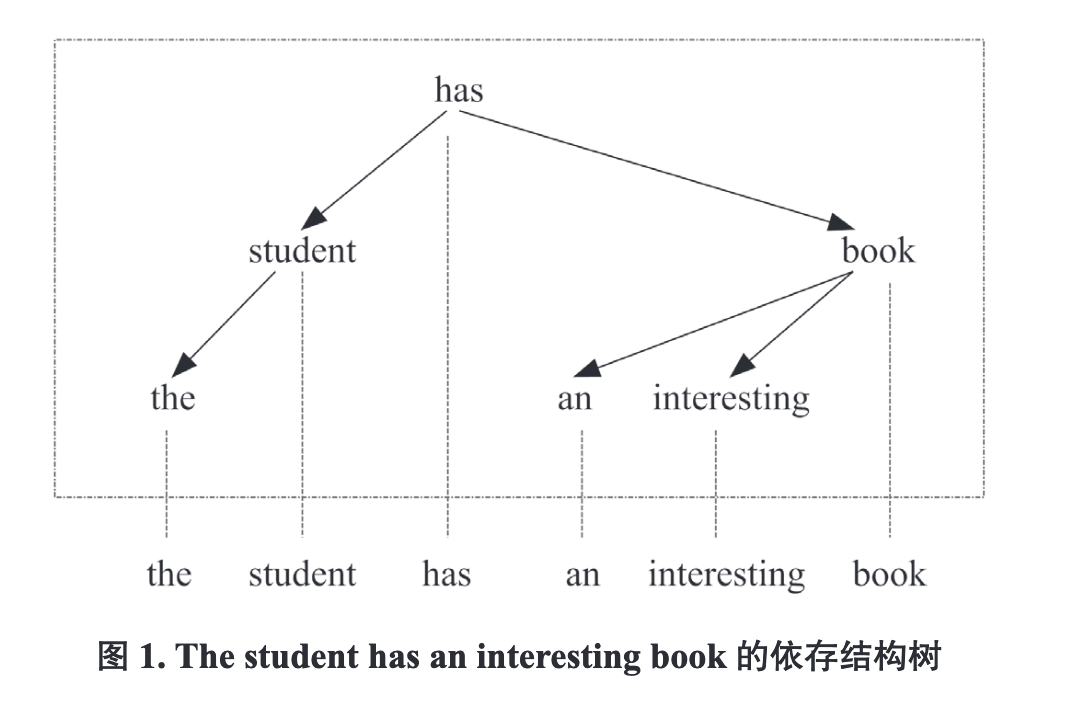
#### 2.3.5 计量语言学句法分析工具-QuanSyn
QuanSyn是杨牧在2024年开发的自动化计量语言学句法分析工具，其中主要包括三个模块：依存关系指标计算模块Depval，语言网络指标计算模块Lingnet，语言指标分布拟合模块Lawfitter。而我们介绍的MDD以及MHD指标的自动化计算在Depval模块中实现。在使用该工具之前，需要先对文本进行依存分析，并且转换为树库文件conllu格式。对于文本的自动化依存分析，目前已有很多开源的工具，例如Stanza和sPacy，LTP等。其中Stanza和sPacy在支持语种数量以及标注准确率上有着较好的表现，故推荐使用以上两种工具先进行自动化依存关系分析，完成依存关系人工校对以及树库格式转换后，再使用QuanSyn进行指标计算。下面我们将演示如何调用Stanza先对示例文本进行依存关系分析，再使用QuanSyn完成树库格式转换以及MDD和MHD指标的计算，并且绘制依存距离的分布直方图。

In [ ]:
#插入代码，调用stanza以及quansyn对示例文件夹中的文本进行依存句法复杂度分析
#https://github.com/stanfordnlp/stanza
#https://github.com/YuhuYang/QuanSyn
import stanza
from quansyn.depval import DepValAnalyzer
import os
import matplotlib.pyplot as plt
import seaborn as sns
nlp = stanza.Pipeline("en")  # 英文模型
def save_to_conllu(doc, filename):
    with open(filename, "w", encoding="utf-8") as f:
        for sentence in doc.sentences:
            for word in sentence.words:
                # 按 CoNLL-U 格式存储
                line = [
                    str(word.id),
                    word.text,
                    word.lemma,  # 提取词形
                    word.upos,  # 提取通用词性
                    word.xpos if word.xpos else "_",  # 提取语言特定词性
                    "_",  # FEATS (未提供)
                    str(word.head),
                    word.deprel,
                    "_",
                    "_",
                ]
                f.write("\t".join(line) + "\n")
            f.write("\n")  # 每个句子之间空一行

def calculate_text_depval(text):
    
    doc = nlp(text) # use stanza to parse the text
    save_to_conllu(doc, "output.conllu") # save the parsed text to a conllu file
    analyzer = DepValAnalyzer(open("output.conllu", encoding='utf-8')) # initialize the depval analyzer
    metrics = ['mdd', 'mhd', 'mhdd', 'mtdl', 'msl', 'mv', 'vk', 'mtw', 'mth', 'hi', 'hf'] # the metrics to calculate
    text_metrics = analyzer.calculate_text_metrics(metrics) # calculate the metrics
    os.remove("output.conllu")
    return text_metrics


def draw_depval_distribution(text, title):
    os.makedirs('dd_distribution_result', exist_ok=True)
    doc = nlp(text) # use stanza to parse the text
    save_to_conllu(doc, "output.conllu") # save the parsed text to a conllu file
    analyzer = DepValAnalyzer(open("output.conllu", encoding='utf-8')) # initialize the depval analyzer
    metrics = ['dd'] # the metrics to calculate
    dep_metrics  = analyzer.calculate_dep_metrics(metrics) # calculate the metrics
    os.remove("output.conllu")
    dd_values = [item for sentence in dep_metrics['dd'] for item in sentence]
    plt.figure(figsize=(10, 6))
    sns.histplot(dd_values, bins=15, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of DD (Dependency Distance) for {title}', fontsize=14)
    plt.xlabel('DD Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'dd_distribution_result/{title}.png')

mdd_values = []
for key, value in essay_dict.items():
    print(f"processing {key}")
    text_metrics = calculate_text_depval(value)
    draw_depval_distribution(value, key)
    print(f"mdd: {text_metrics['mdd']}, mhd: {text_metrics['mhd']}")

